# Observatory

## Menu

**Setup**

* [Create new dataframe](#Crate-new-dataframe)
* [Save dataframe](#Save-dataframe)
* [Load dataframe](#Load-existing-dataframe)

**Analysis**

* [Glimpse](#Glimpse)
* [Stats](#Stats)
* [Transaction explorer](#Transaction-explorer)
* [Plot](#Plot)
* [Volume](#Volume)
* [Daily](#Daily)

**Advanced**

* [Advanced creation](#Advanced-creation)

---

## Create new dataframe

Insert in the cell below the `start` block height and the `end` block height, select your desired filter and run it to create the dataframe.

**Example:**
  
`start = 100`  
`end = 200`  

Will search for transactions between block 100 and block 200 included.

You can also give **negative** values to `start` and this will scan the last chosen blocks **depending** on the `end` value.

**Example:**

`start = -10`  
`end = 0`

Will search for transactions in the last 10 blocks.

**Example:**

`start = -10`  
`end = 5`

Will search for transanction in 5 block starting from ten blocks ago.

In [1]:
import observatory as obs
import advanced.filters as filters


### INSERT HERE ###
start = 654933
end = 659398
txid = ''
address = ''


### CHOOSE ONE OF THE FILTERS BELOW BY REMOVING THE '#' IN FRONT OF IT ###
#tx_filter = filters.TxFilter() # This will return every transaction
#tx_filter = filters.CjTxFilter()
#tx_filter = filters.WasabiTxFilter()
tx_filter = filters.JoinmarketTxFilter()
#tx_filter = filters.TxidTxFilter(txid) # If you pick me, don't forget to insert a 'txid' above.
#tx_filter = filters.AddressTxFilter(address) # If you pick me, don't forget to insert an 'address' above.
#tx_filter = filters.CoinbaseTxFilter()

txs = await obs.create_dataframe(start, end, tx_filter)

4466it [11:29,  6.48it/s]


Created dataframe of **572** transactions in 689.56s

[Save dataframe](#Save-dataframe)

[Start analysis](#Glimpse)

[Back to menu](#Menu)

---

## Save dataframe

Insert the **filepath** where to save and run the cell.

**Examples:**
    
`filepath = 'thisfilename'`  
`filepath = '/home/thisfilename'`  
`filepath = 'results/wasabi/thisfilename'`

Will create a `thisfilename.ftr` file into the given filepath.

In [2]:
### INSERT HERE ###
filepath = 'results/JoinMarket_txs_november'


obs.save(filepath, txs)

Dataframe succesfully saved in 0.13s


[Back to menu](#Menu)

---

## Load existing dataframe

Insert the **filepath** of the dataframe to load and run the cell.

**Examples:**
    
`filepath = 'thisfilename'`  
`filepath = '/home/thisfilename'`  
`filepath = 'results/mytxs/thisfilename'`

Will load the `thisfilename.ftr` file from the given filepath.

In [ ]:
import observatory as obs


### INSERT HERE ###
filepath = 'results/mydataframe'


txs = obs.load(filepath)

[Back to menu](#Menu)

---

## Glimpse

Run the cell below for a glimpse of the dataframe. 

You can change the `n_txs` value to specify how many transactions to display.  
You can also give `n_txs` a **negative** value to display the last n transactions.

You can insert the `sort_by` value to specify which column should give the ordering. e.g. 'n_eq', 'date', etc... Default is 'date'.

In [2]:
### INSERT HERE ###
n_txs = 10
sort_by = ''


obs.show_intro(txs, n_txs, sort_by)

**572 total transactions**

,version,size,vsize,weight,locktime,n_in,n_out,n_eq,den,abs_fee,rel_fee,height,date
txid,,,,,,,,,,,,,
5c8082d04e85290bc87d26b18da604aa43e6cd72bcf4e20e9ba641dd826b8b05,1,1737,1090,4359,0,8,11,6,0.560780,0.000602,55.2,654940,2020-11-01 01:58:00
d460902cfc591e953fbdaa1ab5a5e91abf31a3b563afde45a2ae92516320a40b,1,2218,1330,5320,0,11,10,5,1.018965,0.004191,315.1,654947,2020-11-01 03:19:00
44ec04c91fee0409c157564132ca147c7d987ff456c5a08eba134d06e8c622a1,1,1599,1032,4125,0,7,12,6,1.096979,0.003124,302.7,654983,2020-11-01 09:22:00
82399a19d0b8c2210bba729cbc8ba8e5a5caa0df757005edb4e7b86f48b09896,1,2141,1335,5339,0,10,13,7,0.140045,0.000720,53.9,654992,2020-11-01 11:24:00
b3cf6ea874f30d3f54ba97cb64748a5d0a47f2c6cafb2bac111dcd2c4ec9b337,1,1939,1213,4849,0,9,12,6,1.164270,0.003665,302.1,655012,2020-11-01 16:19:00
e62f0152c5e51b2c9dfed956fded2cc63f8d0fae2a552cbf015b249e8f01f793,1,2043,1159,4635,0,11,13,7,0.997007,0.002510,216.6,655013,2020-11-01 16:38:00
8cc72f6268b80a56e47e9f61404c574f4ee1bd1885f1d8db28b8378fabda448e,1,1735,1090,4357,0,8,11,6,0.115387,0.000663,60.9,655019,2020-11-01 17:36:00
5aaee39dfcdadcf7938536b0df4c4a010f81050e9396f8f86571ae49b0ae9d24,1,1534,967,3868,0,7,10,5,1.166995,0.002923,302.3,655051,2020-11-01 22:56:00
d083de62ea81c1aa72921b45701334edee700368a01d22842195fd8d78e3feaf,1,1029,625,2499,0,5,5,3,2.631012,0.000124,19.8,655063,2020-11-02 01:40:00


[Back to menu](#Menu)

---

## Stats

Run the cell below for a list of statistics about the dataframe.

In [3]:
obs.show_stats(txs)

,version,size,vsize,weight,locktime,n_in,n_out,n_eq,den,abs_fee,rel_fee,height
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.076923,2673.410839,1616.725524,6465.442308,44882.942308,13.094406,13.699301,7.134615,2.189241,0.001443,89.288287,657124.529720
std,0.266703,1731.219383,969.648244,3878.605266,166070.748118,9.523949,6.501822,3.218988,6.974836,0.002700,130.812395,1315.245661
min,1.000000,685.000000,443.000000,1769.000000,0.000000,3.000000,5.000000,3.000000,0.000100,0.000006,1.000000,654940.000000
25%,1.000000,1588.000000,998.750000,3993.000000,0.000000,7.000000,10.000000,5.000000,0.075806,0.000110,7.900000,655992.750000
50%,1.000000,2281.000000,1404.000000,5616.000000,0.000000,11.000000,13.000000,7.000000,0.495424,0.000651,61.100000,657080.000000
75%,1.000000,3236.250000,1957.250000,7828.000000,0.000000,16.000000,17.000000,9.000000,1.273834,0.001702,109.175000,658227.750000
max,2.000000,17647.000000,9579.000000,38314.000000,659315.000000,100.000000,68.000000,34.000000,121.504823,0.032909,1579.500000,659396.000000


[Back to menu](#Menu)

---

## Transaction explorer

Run the cell below to display information about single transactions.

If you set `display_all = True` the result will include every input and every output.  
If the transaction is huge, or you are looking at more than one transanction. this could be slow or even freeze your browser.

In [4]:
### INSERT HERE ###
txid = '64a9a89cc0f9d6639ea9802484a11f46470f010a5c7b77ffe229cf213e1312cf'
display_all = False

obs.show_tx(txs, txid, display_all)

,version,size,vsize,weight,locktime,n_in,n_out,n_eq,den,abs_fee,rel_fee,height,date
txid,,,,,,,,,,,,,
64a9a89cc0f9d6639ea9802484a11f46470f010a5c7b77ffe229cf213e1312cf,1,3835,2383,9529,0,18,23,12,0.082209,0.000402,16.9,655065,2020-11-02 01:49:00


### Inputs

,txid,height,value,vout,addresses,type,available
0,b8a2ac0b9a94422241aa03b9cae9d523f22a8bad8b83d6667f9bf8dcd74620bf,644662,0.004602,4,[3KugEUtybkxzx2xkt5beJoptcQM6aTBEbN],scripthash,False
1,091a3525b3863684c8a051248b21d249bb4bbe029dc75dec8a3c55d747a9f4ea,654561,0.026277,11,[38ZRvxToBPuEZKQt7Ew7NymTCPT3tnKUH9],scripthash,False
2,b4e8bde0c1762653da8dda43559c5e81bf54c7f7f7fbbcf0911c973412c8369c,650606,0.006781,15,[3QMW8GKtSxe5bLPGp9UK47rfSeSuQirBKK],scripthash,False
3,838d3790dbaebbd8bbf3e5662a1783403d0b0c52984597f3fbe8bb50e1b45a1a,654964,0.082620,0,[3FcujcMwd6FwXniH6bBYXsBxD9mCC5uLdV],scripthash,False
4,c7255d7351e19fc5c4d54ce605bd7f4258ddee224865bcd9b49907694657c9e8,654635,0.171800,4,[3Pd6rJ3QNrUu4RfarMjXR2h2ttdwP1Cgog],scripthash,False
5,470d043ec2e9e00cae166d90e9181a0e5ccbe2a3165e6de69f30e504e8d4a70e,654082,0.263000,5,[35VZ9uyfQHmr5XArGaZAmtxf8vfLm8fzvT],scripthash,False
6,d0e9e4a2ceba3282a4bfd747c1e262e1aedad43ec4028d893084b59558d94ffe,653857,0.069474,17,[3EtaKmgrMvDBPzhEo1XXdBeBeD5sy58RBo],scripthash,False
7,12e1cbe475f27d018abc93c2c2f097ab9753033c3dd3e53f782abebc948dff03,652532,0.021946,15,[34XykX4oCksCice9Um4evmVGmCKpMfWp4g],scripthash,False
8,0e0e10aaa416de0e358598cc4aebfa0f7ae2c663ab1b686a52266efddce40bb0,652619,0.100000,1,[3GhCbP5TQLimueMCKgY3BzKFTuv6vfSKgY],scripthash,False
9,961b9e0ba6a4ffea2e5b6458dd6157b3e4bb6384735413288f7047dbba1fffce,654252,0.131814,11,[3Q8jQZbq4R6CGWhZM827EU7rdLP8Tp79nQ],scripthash,False


### Outputs

,value,addresses,type
vout,,,
0,0.278173,[3ACmFSmm7g7wdss564HcGrpc63ESSqn3Sp],scripthash
1,0.180791,[3C991xu5S7C7GRnawMPrzhqRGFfHrUspN7],scripthash
2,0.017793,[3H2i5UG878XksTFLB17ZugA2tEcbek1b11],scripthash
3,0.082209,[3Gx26rvSHPWnKr4gPoA3JR9cvmCbeN5vAV],scripthash
4,0.089591,[3Mi5kwFxGofJwf3Jog3KDJbgDcRgwUSt2u],scripthash
5,0.082209,[3ASg5JyijFUKYSKCr4SCGpoqQNRUiisWP8],scripthash
6,0.013530,[3HXY9nwSxGvywvVrNyiU7HRFKtckPKkPSJ],scripthash
7,0.082209,[38rwx3Ht5DvqhcQbtvzy2Tc1YpPgvGVYbC],scripthash
8,0.082209,[3DRCe8AjzYRJkvC3NV18tQHZURG9xuu9Ch],scripthash


[Back to menu](#Menu)

---

## Plot

Run the cell below to plot the desired `column`.

If you give it a `filepath`, the result graph will be saved.

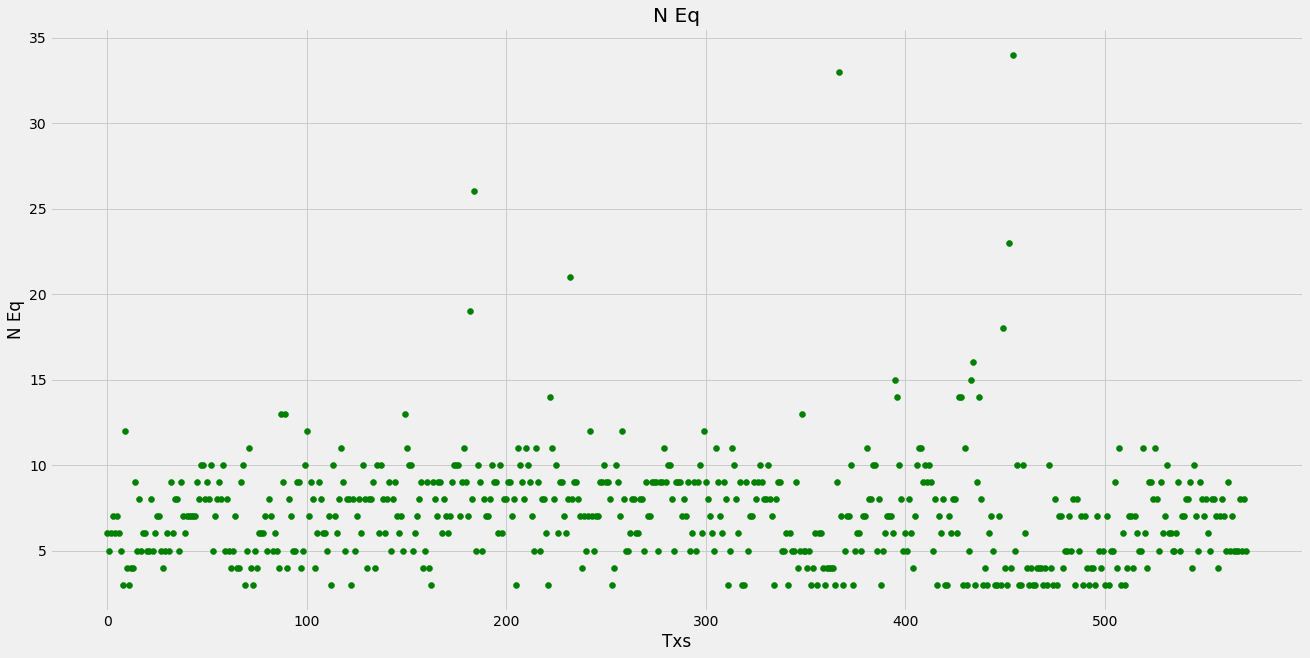

In [5]:
### INSERT HERE ###
column = 'n_eq'
filepath = ''

obs.show_graph(txs, column, filepath)

[Back to menu](#Menu)

---

## Volume

Run the cell below to show the volume graph.

If you give it a filepath, the result graph will be saved.

**Input** volume: 24452.33562629

**Equal output** volume: 9006.29233055

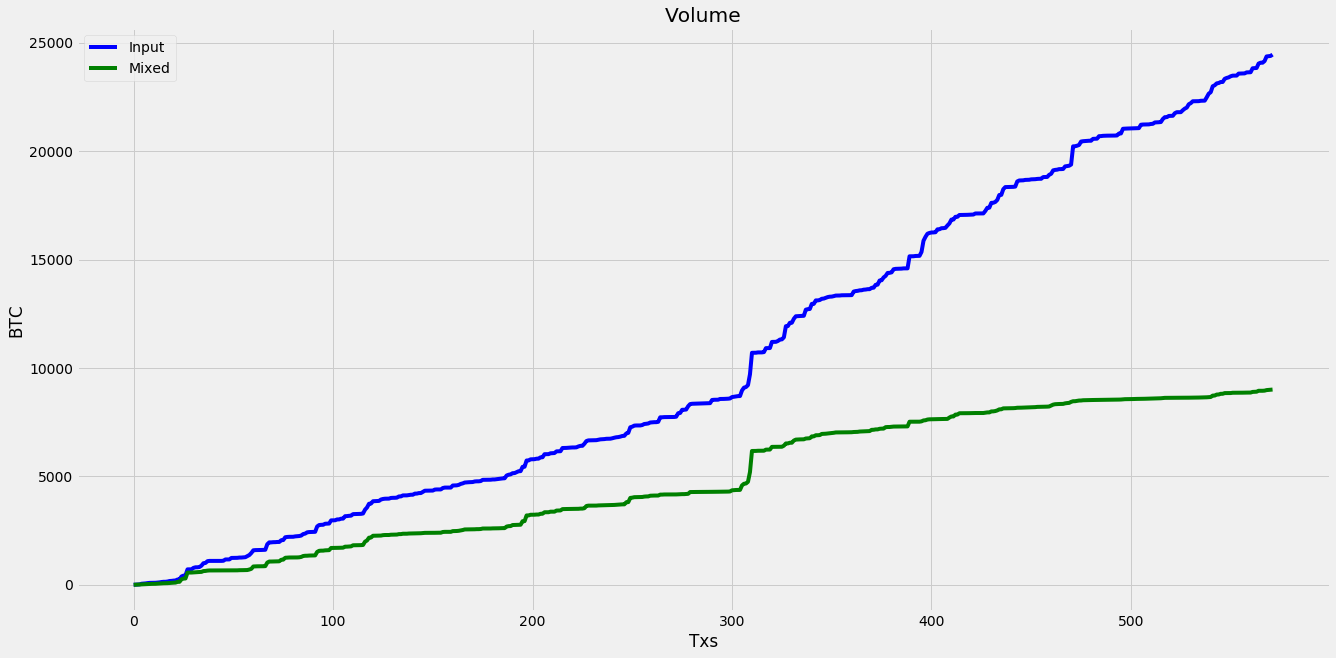

In [6]:
filepath = ''

obs.show_volume(txs, filepath)

[Back to menu](#Menu)

---

## Daily

Run the cell below to show the transanctions per day graph.

If you give it a filepath, the result graph will be saved.

**Average daily**: 19.1

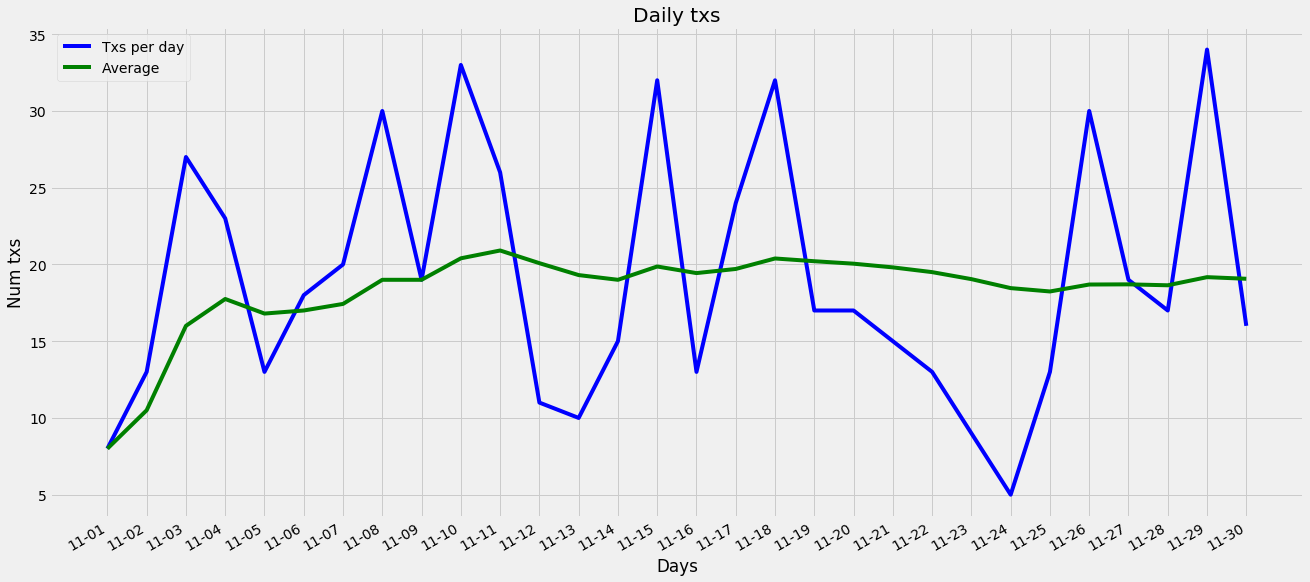

In [7]:
filepath = ''

obs.show_daily(txs, filepath)

[Back to menu](#Menu)

---

## Advanced creation

Here you can create a dataframe using your own filters.  
You can also pass more than one filter and every transaction that matches at least one of them will be included in the dataframe.
**Each and every** criteria has to be satisfied in order for a transaction to match a filter.

Valid criteria are:
* **txid**
    * e.g., `txid='mytxid'` will scan for transactions that include 'mytxid' in the txid.
* **address**
    * e.g., `addresses=['myaddress']` will scan for transactions that include 'myaddress' in at least one of the addresses. Accept multiple addresses (each and every of them has to be part in a transaction for the transaction to match the filter).
* **in_type**
    * e.g., `in_type='scripthash'` will scan for transactions that have all the inputs of type 'scripthash'.
* **out_type**
    * e.g., `out_type='scripthash'` will scan for transactions that have all the outputs of type 'scripthash'.
* **version**
    * e.g., `version=(minversion, maxversion)` will scan for transactions that have a version number between minversion and maxversion included.
* **size**
    * e.g., `size=(minsize, maxsize)` will scan for transactions that have a size between minsize and maxsize included.
* **vsize**
    * e.g., `vsize=(minvsize, maxvsize)` will scan for transactions that have a virtual size between minvsize and maxvsize included.
* **weight**
    * e.g., `weight=(minweight, maxweight)` will scan for transactions that have a weight between minweight and maxweight included.
* **locktime**
    * e.g., `locktime=(minlocktime, maxlocktime)` will scan for transactions that have a locktime between minlocktime and maxlocktime included.
* **n_in**
    * e.g., `n_in=(minn_in, maxn_in)` will scan for transactions that have a number of inputs between minn_in and maxn_in included.
* **n_out**
    * e.g., `n_out=(minn_out, maxn_out)` will scan for transactions that have a number of outputs between minn_out and maxn_out included.
* **n_eq**
    * e.g., `n_eq=(minn_eq, maxn_out)` will scan for transactions that have a number of equally sized outputs between minn_eq and maxn_out included.
* **den**
    * e.g., `den=(minden, maxden)` will scan for transactions that have a denomination between minden and maxden included.
* **abs_fee**
    * e.g., `abs_fee=(minabs_fee, maxabs_fee)` will scan for transactions that have an absolute fee between minabs_fee and maxabs_fee included.
* **rel_fee**
    * e.g., `rel_fee=(minrel_fee, maxrel_fee)` will scan for transactions that have a relative fee between minrel_fee and maxrel_fee included.
* **height**
    * e.g., `height=(minheight, maxheight)` will scan for transactions that have a height between minheight and maxheight included.
* **date**
    * e.g., `date=('2020-09-18', '2020-09-19 19:00')` will scan for transactions that have a date between mindate and maxdate included.      
    
You can also pass arbitrary callables as long as they accept a Tx object as parameter and return True or False.  
e.g., `callables=[mycallable]`

Here's how a filter that searches for transactions that pay more than 100 sat/vbyte and have just 1 input and 1 output would look like.

`tx_filter = filters.TxFilter(n_in=(1, 1), n_out=(1, 1), rel_fee=(100, 100000))`

In [ ]:
import observatory as obs
import advanced.filters as filters


### INSERT HERE ###
start = -10
end = 0
tx_filter = filters.TxFilter(n_in=(1, 1), n_out=(1, 1), rel_fee=(100, 100000))


txs = await obs.create_dataframe(start, end, tx_filter)

[Back to menu](#Menu)

---